# Lab 8 Named Entity Recognition

Named Entity Recognition, also known as entity extraction classifies named entities that are present in a text into pre-defined categories like “person”, “location”, “organization” and “date”


Discovering the named entities adds a wealth of semantic knowledge and helps us to promptly understand the subject of any given text. These entities may be used for further processing like relation extraction or acts as features for some NLP tasks


## Standard libraries for NER in Python

Basically, there are three standard libraries which are used a lot in Python to perform NER i.e.

- NLTK
- spaCy
- Stanford NER


We are going to explore briefly the first two in this final lab session.


## Using NLTK for NER

To perform Named Entity Recognition using NLTK, it needs to be done in three stages 

- Word Tokenization
- Parts of Speech (POS) tagging
- Named Entity Recognition


## NLTK NER

Now let’s perform the first two stages here by downloading the necessary modules:



In [1]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## NLTK NER

Now let’s define some functions to label the named entities(NE) and tokenize the text.


In [2]:
def NE_printLabel(chunk):
     if hasattr(chunk, 'label'):
          print (chunk.label(), ' '.join(c[0] for c in chunk.leaves()))

def nltk_ner(text):
     for sent in nltk.sent_tokenize(text):
          for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
               NE_printLabel(chunk)
     return


Finally, let’s label some sentences to discover the named entities:



In [3]:
nltk_ner("A brain injury inflicted by a stranger could have been a key for Paul Aldridge, 43, from London, who beat hitchhiker Tommy McLauglin, 60, to death in 1996.")



PERSON Paul Aldridge
GPE London
PERSON Tommy McLauglin


What named entities resulted from the sentence? 
**PERSON, GPE**

Are they correct?
**Yes**

Next, let’s try the same task using spaCy

In [4]:
import spacy
!python -m spacy download en_core_web_md
from spacy import displacy
import en_core_web_md
nlp = en_core_web_md.load()

#to print token with NE label
from pprint import pprint


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-03 04:02:58.909356: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 225 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


## NER using spaCy

spaCy supports the following entity types:

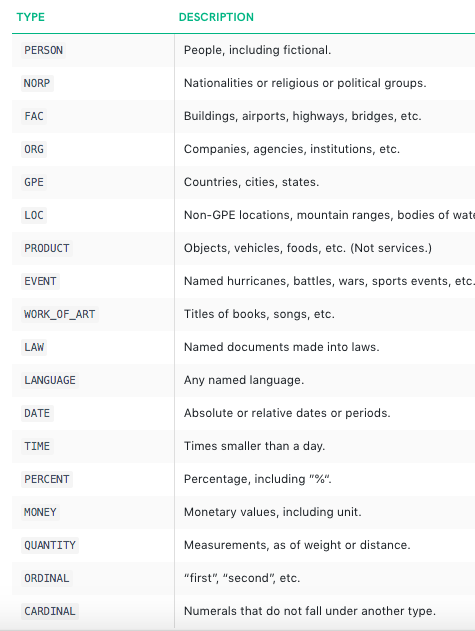


Let's observe the output for a sample input sentence:

In [5]:
def spacy_ner(input_text):
    doc = nlp(input_text)
    pprint([(X.text, X.label_) for X in doc.ents])
    #visual NE in text
    displacy.render((nlp(str(input_text))), jupyter=True, style='ent')

input_text = 'A brain injury inflicted by a stranger could have been a key for Paul Aldridge, 43, from London, who beat hitchhiker Tommy McLauglin, 60, to death in 1996.'
spacy_ner(input_text)



[('Paul Aldridge', 'PERSON'),
 ('43', 'DATE'),
 ('London', 'GPE'),
 ('Tommy McLauglin', 'PERSON'),
 ('60', 'DATE'),
 ('1996', 'DATE')]


# Lab Task

Choose a short article from any online newspapers like *the Star Online* that may contain some named entities.

Write a program for NER based on the article using NLTK and spaCy libraries.
Answer the following questions:
- Are the labeled entity types correct for the named entities in both libraries? If there are errors, why do you think the error occurs?
- Do they differ in terms of the labeled entity types? State the differences with examples from the article.
- Which library yields better result? NLTK or spaCy?

State your answers in the program and upload it UKMfolio by **6 January 2023**. Good luck :)




In [8]:
#your NER program here
nltk_ner('“Meanwhile, DBKL (Kuala Lumpur City Hall) has a free bus service called the MySchoolBus@Wilayah programme, which caters for children from public housing, so this is why a targeted mechanism is important,” he added. Selangor, Putrajaya and Kuala Lumpur School Bus Association president Mohd Haron Mohd Sidik proposed a 50-50 mechanism borne by the government and parents.')


ORGANIZATION DBKL
PERSON Kuala Lumpur City Hall
ORGANIZATION MySchoolBus
GPE Selangor
PERSON Putrajaya
PERSON Kuala Lumpur School Bus
PERSON Mohd Haron Mohd Sidik


In [7]:
input_text = '“Meanwhile, DBKL (Kuala Lumpur City Hall) has a free bus service called the MySchoolBus@Wilayah programme, which caters for children from public housing, so this is why a targeted mechanism is important,” he added. Selangor, Putrajaya and Kuala Lumpur School Bus Association president Mohd Haron Mohd Sidik proposed a 50-50 mechanism borne by the government and parents.'
spacy_ner(input_text)


[('DBKL', 'GPE'),
 ('Kuala Lumpur City Hall', 'GPE'),
 ('MySchoolBus@Wilayah', 'GPE'),
 ('Selangor', 'GPE'),
 ('Putrajaya', 'GPE'),
 ('Kuala Lumpur School Bus Association', 'ORG'),
 ('Mohd Haron Mohd Sidik', 'PERSON'),
 ('50-50', 'CARDINAL')]


Proper mechanism crucial to distributing aid

https://www.thestar.com.my/news/nation/2023/01/03/proper-mechanism-crucial-to-distributing-aid 

Comments on the output:
1. Are the labeled entity types correct for the named entities in both libraries? If there are errors, why do you think the error occurs?

In NLTK library, some entity types are labelled wrongly. For example, 'Kuala Lumpur City Hall' should be an organization, 'Putrajaya' should be GPE (a city) and 'Kuala Lumpur School Bus' should be ab organization. This is because the rule based approach in NER might be wrong.

In SpaCy library,some entity types are labelled wrongly. For example, 'DBKL' and 'Kuala Lumpur City Hall' and 'MySchoolBus@Wilayah' should be ORG. This is because the entity have some keywords that are related to another entity type such as 'KL', 'Kuala Lumpur' and 'Wilayah'.


2. Do they differ in terms of the labeled entity types? State the differences with examples from the article.

Yes.

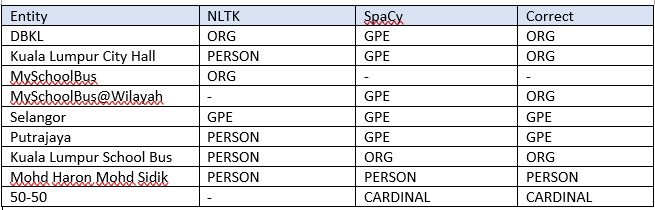

3. Which library yields better result? NLTK or spaCy?

spaCy

NAME: CHONG WEI YI

MATRIC NO: A180497

